refs:

https://lmfit.github.io/lmfit-py  
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.473.6406&rep=rep1&type=pdf  
http://www.ihaltas.com/courses/fbe_elk5320/eng/projects/Project_37.pdf  
https://www.cybernet.co.jp/beetech/product/designkit/pdf/dcmotor/manual.pdf  
https://lpsa.swarthmore.edu/Analogs/ElectricalMechanicalAnalogs.html  
http://ecee.colorado.edu/ecen2270/lectures/Lecture03.pdf  


In [1]:
def read_oscilloscope_csv_old(file_name: str, type: str="tek_tds1012") -> list:
    import csv

    if type == "tek_tds1012":
        raw_x = []
        raw_y = []

        with open(file_name, 'r') as csv_file:
            c = csv.reader(csv_file)

            in_header = True
            for row in c:
                if in_header:
                    if row[0] == 'Record Length':
                        record_length = float(row[1])
                    if row[0] == 'Sample Interval':
                        sample_interval = float(row[1])
                    if row[0] == 'Source':
                        source = str(row[1])
                    if row[0] == 'Vertical Units':
                        vertical_units = str(row[1])
                    if row[0] == 'Vertical Scale':
                        vertical_scale = float(row[1])
                    if row[0] == 'Vertical Offset':
                        vertical_offset = float(row[1])
                    if row[0] == 'Horizontal Units':
                        horizontal_units = str(row[1])
                    if row[0] == 'Horizontal Scale':
                        horizontal_scale = float(row[1])
                    if row[0] == 'Pt Fmt':
                        pt_fmt = str(row[1])
                    if row[0] == 'Yzero':
                        yzero = float(row[1])
                    if row[0] == 'Probe Atten':
                        probe_atten = float(row[1])
                    if row[0] == 'Model Number':
                        model_number = str(row[1])
                    if row[0] == 'Serial Number':
                        serial_number = str(row[1])
                    if row[0] == 'Firmware Version':
                        firmware_version = str(row[1])
                        in_header = False
                else:
                    raw_x.append(float(row[3]))
                    raw_y.append(float(row[4]))

            info_dict = {
                'Record Length': record_length,
                'Sample Interval': sample_interval,
                'Source': source,
                'Vertical Units': vertical_units,
                'Vertical Scale': vertical_scale,
                'Vertical Offset': vertical_offset,
                'Horizontal Units': horizontal_units,
                'Horizontal Scale': horizontal_scale,
                'Pt Fmt': pt_fmt,
                'Yzero': yzero,
                'Probe Atten': probe_atten,
                'Model Number': model_number,
                'Serial Number': serial_number,
                'Firmware Version': firmware_version,
            }

        return np.array(raw_x), np.array(raw_y), info_dict
    
def read_oscilloscope_csv(file_name: str) -> list:
    import csv
    
    with open(file_name, 'r') as csv_file:
        c = csv.reader(csv_file)

        raw_x = []
        raw_y_CH1 = []
        raw_y_CH2 = []
        raw_y_CH3 = []
        raw_y_CH4 = []
        probe_atten = [0,0,0,0]
        vertical_units = ['','','','']
        vertical_offset = [0,0,0,0]
        vertical_scale = [0,0,0,0]

        in_header = True
        for row in c:
            if row:
                if in_header:
                    if row is []:
                        pass
                    if row[0] == 'Model':
                        model_number = str(row[1])
                    if row[0] == 'Firmware Version':
                        firmware_version = str(row[1])
                    if row[0] == 'Horizontal Units':
                        horizontal_units = str(row[1])
                    if row[0] == 'Horizontal Scale':
                        horizontal_scale = float(row[1])    
                    if row[0] == 'Sample Interval':
                        sample_interval = float(row[1])
                    if row[0] == 'Filter Frequency':
                        sample_interval = float(row[1])
                    if row[0] == 'Record Length':
                        record_length = float(row[1])
                    if row[0] == 'Probe Attenuation':
                        probe_atten[0] = float(row[1])
                        probe_atten[1] = float(row[2])
                        probe_atten[2] = float(row[3])
                    if row[0] == 'Vertical Units':
                        vertical_units[0] = str(row[1])
                        vertical_units[1] = str(row[2])
                        vertical_units[2] = str(row[3])
                    if row[0] == 'Vertical Offset':
                        vertical_offset[0] = float(row[1])
                        vertical_offset[1] = float(row[2])
                        vertical_offset[2] = float(row[3])
                    if row[0] == 'Vertical Scale':
                        vertical_scale[0] = float(row[1])
                        vertical_scale[1] = float(row[2])
                        vertical_scale[2] = float(row[3])
                    if row[0] == 'Label':
                        pass
                    if row[0] == 'TIME':
                        in_header = False
                else:
                    raw_x.append(float(row[0]))
                    raw_y_CH1.append(float(row[1]))
                    raw_y_CH2.append(float(row[2]))
                    raw_y_CH3.append(float(row[3]))
                    raw_y_CH4.append(float(row[4]))

        info_dict = {
            'Record Length': record_length,
            'Sample Interval': sample_interval,
            'Vertical Units': vertical_units,
            'Vertical Scale': vertical_scale,
            'Vertical Offset': vertical_offset,
            'Horizontal Units': horizontal_units,
            'Horizontal Scale': horizontal_scale,
            'Probe Atten': probe_atten,
            'Firmware Version': firmware_version,
        }
            
        return np.array(raw_x), np.array(raw_y_CH1), np.array(raw_y_CH2), np.array(raw_y_CH3), np.array(raw_y_CH4), info_dict

def read_oscilloscope_csv_other(file_name: str) -> list:
    import csv
    
    with open(file_name, 'r') as csv_file:
        c = csv.reader(csv_file)

        index_CH1 = 1
        index_CH2 = 3
        index_CH3 = 5

        raw_x = []
        raw_y_CH1 = []
        raw_y_CH2 = []
        raw_y_CH3 = []
        probe_atten = [0,0,0]
        vertical_units = ['','','']
        vertical_offset = [0,0,0]
        vertical_scale = [0,0,0]

        in_header = True
        for row in c:
            if row:
                if in_header:
                    if row is []:
                        pass
                    if row[0] == 'Model':
                        model_number = str(row[1])
                    if row[0] == 'Firmware Version':
                        firmware_version = str(row[1])
                    if row[0] == 'Horizontal Units':
                        horizontal_units = str(row[1])
                    if row[0] == 'Horizontal Scale':
                        horizontal_scale = float(row[1])    
                    if row[0] == 'Sample Interval':
                        sample_interval = float(row[1])
                    if row[0] == 'Filter Frequency':
                        sample_interval = float(row[1])
                    if row[0] == 'Record Length':
                        record_length = float(row[1])
                    if row[0] == 'Probe Attenuation':
                        probe_atten[0] = float(row[index_CH1])
                        probe_atten[1] = float(row[index_CH2])
                        probe_atten[2] = float(row[index_CH3])
                    if row[0] == 'Vertical Units':
                        vertical_units[0] = str(row[index_CH1])
                        vertical_units[1] = str(row[index_CH2])
                        vertical_units[2] = str(row[index_CH3])
                    if row[0] == 'Vertical Offset':
                        vertical_offset[0] = float(row[index_CH1])
                        vertical_offset[1] = float(row[index_CH2])
                        vertical_offset[2] = float(row[index_CH3])
                    if row[0] == 'Vertical Scale':
                        vertical_scale[0] = float(row[index_CH1])
                        vertical_scale[1] = float(row[index_CH2])
                        vertical_scale[2] = float(row[index_CH3])
                    if row[0] == 'Label':
                        pass
                    if row[0] == 'TIME':
                        in_header = False
                else:
                    raw_x.append(float(row[0]))
                    raw_y_CH1.append(float(row[index_CH1]))
                    raw_y_CH2.append(float(row[index_CH2]))
                    raw_y_CH3.append(float(row[index_CH3]))

        info_dict = {
            'Record Length': record_length,
            'Sample Interval': sample_interval,
            'Vertical Units': vertical_units,
            'Vertical Scale': vertical_scale,
            'Vertical Offset': vertical_offset,
            'Horizontal Units': horizontal_units,
            'Horizontal Scale': horizontal_scale,
            'Probe Atten': probe_atten,
            'Firmware Version': firmware_version,
        }
            
        return np.array(raw_x), np.array(raw_y_CH1), np.array(raw_y_CH2), np.array(raw_y_CH3), info_dict

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def downsampling(arr, n):
    end =  n * int(len(arr)/n)
    return np.mean(arr[:end].reshape(-1, n), 1)


## READING OSCILLOSCOPE DATA - High-Frequency data
 
data_file_hf = [
    'data/T0003.CSV',
    'data/T0002.CSV',
    'data/T0004.CSV',
    'data/T0005.CSV',
    'data/T0006.CSV',
    'data/T0007.CSV',
]

ydata_hf = []
xdata_hf = []

for file in data_file_hf:
    time_hf, _, _ydata, _xdata, _, _ = read_oscilloscope_csv(file)
    ydata_hf.append(_ydata)
    xdata_hf.append(_xdata)
    
xdata_hf_all = np.concatenate(xdata_hf, axis=None)
ydata_hf_all = np.concatenate(ydata_hf, axis=None)

## READING OSCILLOSCOPE DATA - Low-Frequency data

data_file_lf = 'data/motor.csv'
time_lf, xdata_lf, ydata_lf_p1, ydata_lf_p2, info_dict_lf = read_oscilloscope_csv_other(data_file_lf)
ydata_lf = ydata_lf_p1 + ydata_lf_p2
del ydata_lf_p1, ydata_lf_p2

In [3]:
# Downsampling
downsampling_factor = 1000

# low-frequency data
time_lf = downsampling(time_lf, downsampling_factor)
xdata_lf = downsampling(xdata_lf, downsampling_factor)
ydata_lf = downsampling(ydata_lf, downsampling_factor)

# high-frequency data
time_hf = downsampling(time_hf, downsampling_factor)
for i,xdata in enumerate(xdata_hf):
    xdata_hf[i] = downsampling(xdata, downsampling_factor)
    
for i,ydata in enumerate(ydata_hf):
    ydata_hf[i] = downsampling(ydata, downsampling_factor)

# high-frequency stacked data
xdata_hf_all = downsampling(xdata_hf_all, downsampling_factor)
ydata_hf_all = downsampling(ydata_hf_all, downsampling_factor)


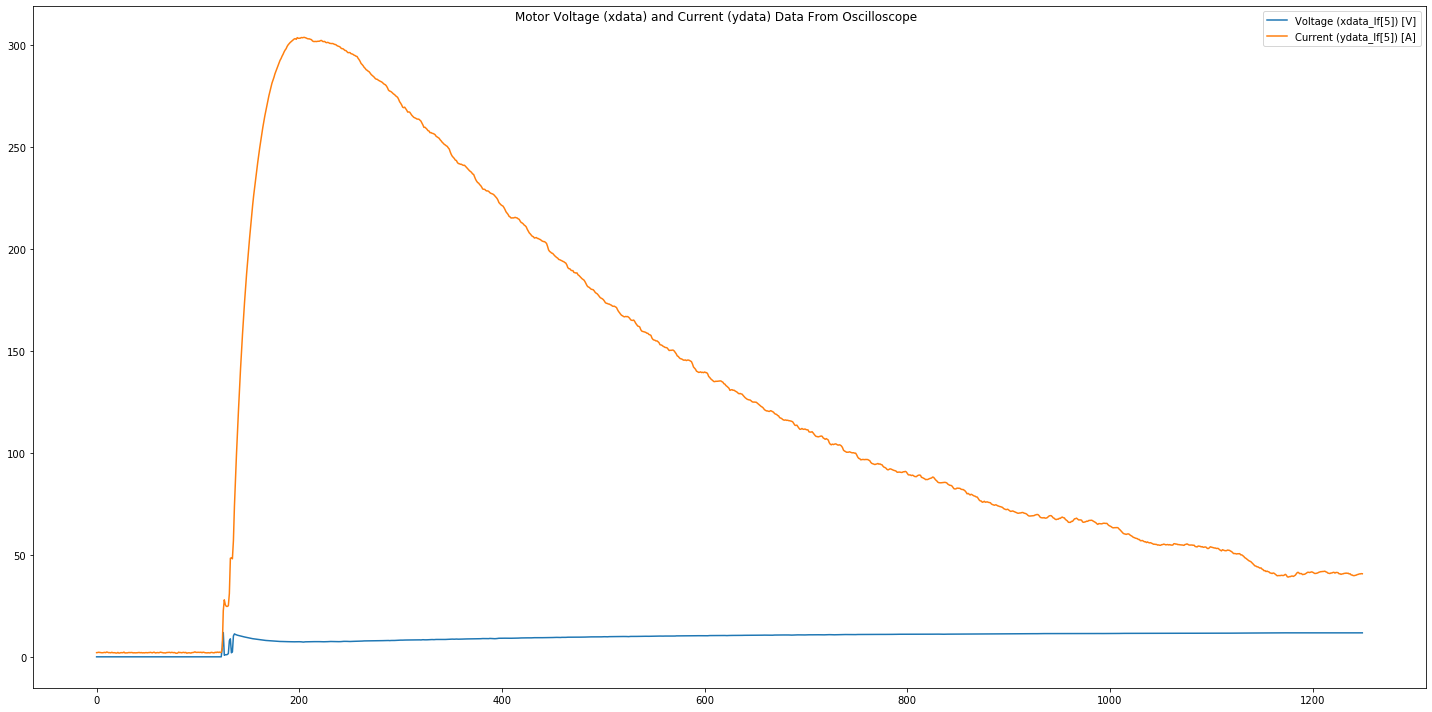

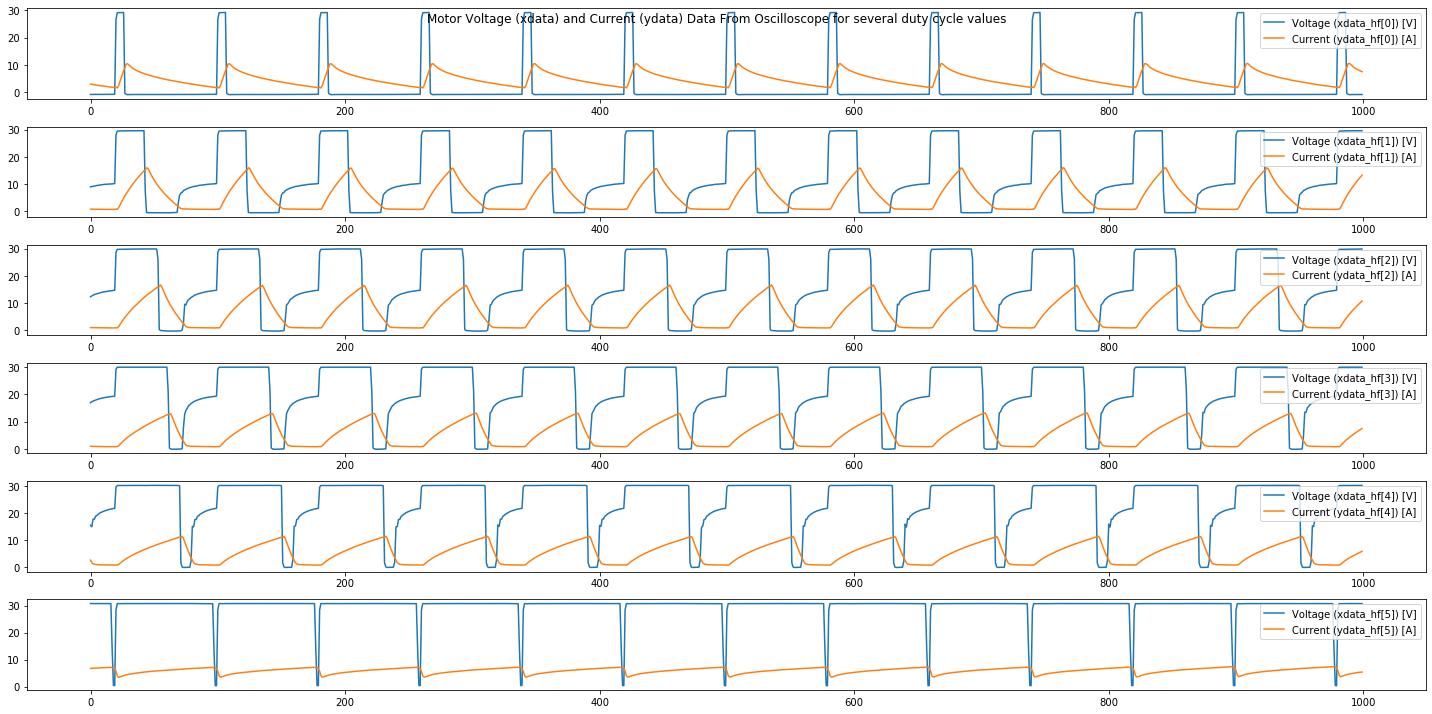

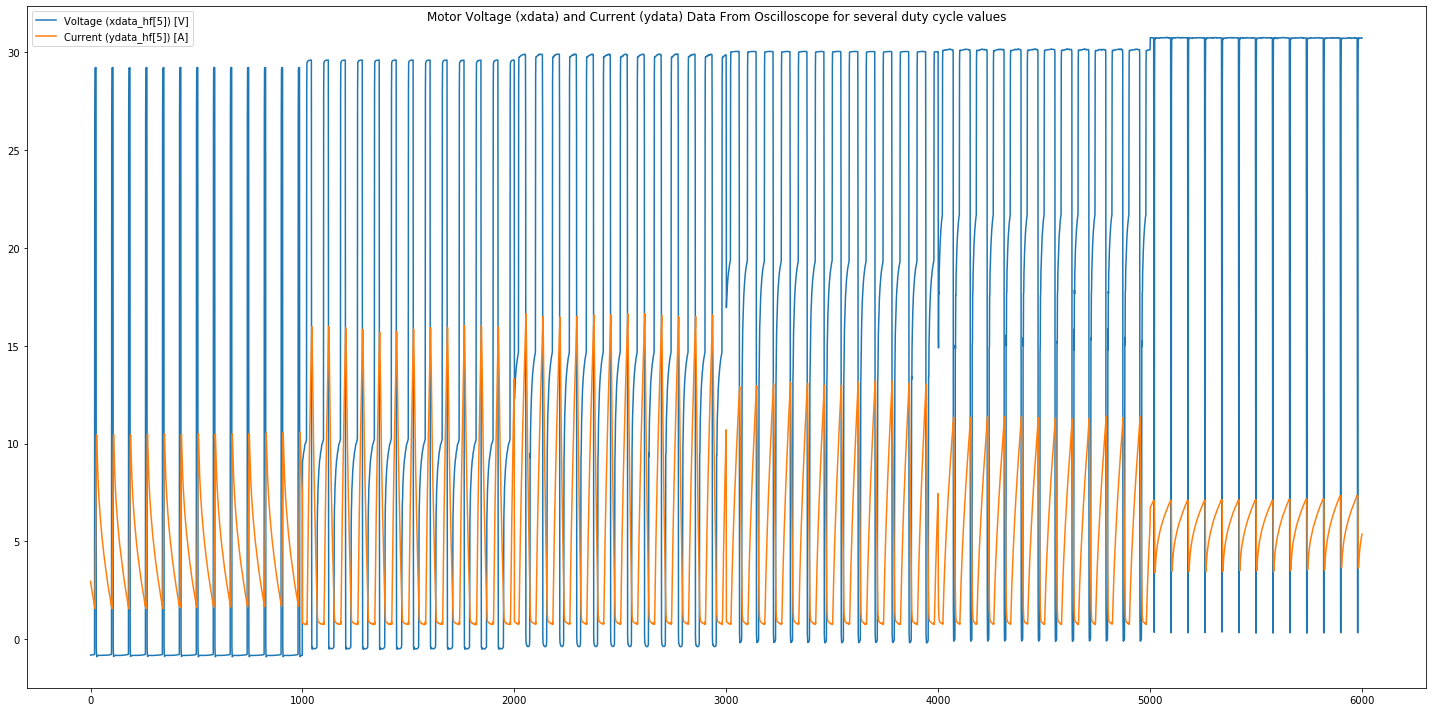

In [4]:
# Data Plots

# low-frequency data
fig = plt.figure(figsize=(20,10))
fig.suptitle('Motor Voltage (xdata) and Current (ydata) Data From Oscilloscope')
plt.plot(xdata_lf, label=f'Voltage (xdata_lf[{i}]) [V]')
plt.plot(ydata_lf, label=f'Current (ydata_lf[{i}]) [A]')
plt.legend()
plt.tight_layout()

# high-frequency data
fig = plt.figure(figsize=(20,10))
fig.suptitle('Motor Voltage (xdata) and Current (ydata) Data From Oscilloscope for several duty cycle values')
for i, _ in enumerate(xdata_hf, start=0):
    plt.subplot(len(data_file_hf), 1, i+1)
    plt.plot(xdata_hf[i], label=f'Voltage (xdata_hf[{i}]) [V]')
    plt.plot(ydata_hf[i], label=f'Current (ydata_hf[{i}]) [A]')
    plt.legend()
plt.tight_layout()

# high-frequency stacked data
fig = plt.figure(figsize=(20,10))
fig.suptitle('Motor Voltage (xdata) and Current (ydata) Data From Oscilloscope for several duty cycle values')
plt.plot(xdata_hf_all, label=f'Voltage (xdata_hf[{i}]) [V]')
plt.plot(ydata_hf_all, label=f'Current (ydata_hf[{i}]) [A]')
plt.legend()
plt.tight_layout()



In [5]:
import control
import lmfit

def motor(Ra: np.float, 
          La: np.float, 
          B: np.float, 
          J: np.float,
          kv: np.float, 
          kt: np.float) -> control.TransferFunction:
    
    sys = control.tf(
        [1 / La, B / (J * La)],
        [1, 
         (Ra / La) + (B / J),
         ((Ra * B) / (La * J)) + ((kv * kt) / (La * J))
        ]
    )
    
    return sys
    

def func(Va, Ra, La, B, J, kv, kt):
    
    sys = motor(Ra, La, B, J, kv, kt)
    
    _, Ia, _ = control.forced_response(
        sys, 
        T=time, 
        U=Va, 
    )
    
    return Ia


# Dados do motor
I_normal_load = 98
T_normal_load = 9.8
V_no_load = 48
RPM_no_load = 4800
I_stall = np.max(ydata_lf)
V_stall = xdata_lf[np.argmax(ydata_lf)]

# Valores iniciais
Ra_0 = V_stall / I_stall
La_0 = 68e-6
B_0 = 1.5
J_0 = 1
kv_0 = (np.pi/30.0) * RPM_no_load / V_no_load
kt_0 = T_normal_load / I_normal_load

# Define limites das constantes
Ra_min = Ra_0 * 0.1
Ra_max = Ra_0 * 10
La_min = La_0 * 0.01
La_max = La_0 * 100
B_min = 1e-6
B_max = 1e6
J_min = 1e-6
J_max = 1e6
kv_min = kv_0 * 0.9
kv_max = kv_0 * 1.1
kt_min = kt_0 * 0.9
kt_max = kt_0 * 1.1

model = lmfit.Model(func)

params = lmfit.Parameters()
# NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP
params.add_many(
    ('Ra', Ra_0, True, Ra_min, Ra_max, None, None),
    ('La', La_0, True, La_min, La_max, None, None),
    ('B', B_0, True, B_min, B_max, None, None),
    ('J', J_0, True, J_min, J_max, None, None),
    ('kv', kv_0, False, kv_min, kv_max, None, None),
    ('kt', kt_0, False, kt_min, kt_max, None, None),
)
params

name,value,initial value,min,max,vary
Ra,0.02412774,0.024127740517201655,0.00241277,0.24127741,True
La,6.8000e-05,6.8e-05,6.8000e-07,0.00680000,True
B,1.50000000,1.5,1.0000e-06,1000000.00,True
J,1.00000000,1,1.0000e-06,1000000.00,True
kv,10.4719755,10.471975511965978,9.42477796,11.5191731,False
kt,0.10000000,0.1,0.09000000,0.11000000,False


In [6]:
def print_spice_model_parameters(result_hf):
    Ra = result_hf.params['Ra'].value
    La = result_hf.params['La'].value
    B = result_hf.params['B'].value
    J = result_hf.params['J'].value
    kv = result_hf.params['kv'].value
    kt = result_hf.params['kt'].value

    print('Parameter for SPICE: model')
    print(f'.param Ra = {Ra}')
    print(f'.param La = {La}')
    print(f'.param B = {B}')
    print(f'.param J = {J}')
    print(f'.param kv = {kv}')
    print(f'.param kt = {kt}')
    
def get_and_print_sys_model(result_hf):
    Ra = result_hf.params['Ra'].value
    La = result_hf.params['La'].value
    B = result_hf.params['B'].value
    J = result_hf.params['J'].value
    kv = result_hf.params['kv'].value
    kt = result_hf.params['kt'].value

    sys_motor = motor(Ra, La, B, J, kv, kt)
    print(f'\nIa/Va = {sys_motor}')

    control.pzmap(sys_motor);
    
    return sys_motor

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 137
    # data points      = 1000
    # variables        = 4
    chi-square         = 464.124727
    reduced chi-square = 0.46598868
    Akaike info crit   = -759.601954
    Bayesian info crit = -739.970933
[[Variables]]
    Ra:  0.19575600 +/- 0.02185954 (11.17%) (init = 0.02412774)
    La:  2.3223e-05 +/- 2.3091e-07 (0.99%) (init = 6.8e-05)
    B:   6.07532246 +/- 0.76349697 (12.57%) (init = 0.001)
    J:   2.3913e-04 +/- 6.7544e-05 (28.25%) (init = 0.001)
    kv:  10.47198 (fixed)
    kt:  0.1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ra, B)  =  0.996
    C(Ra, J)  =  0.918
    C(B, J)   =  0.906
    C(Ra, La) = -0.551
    C(La, B)  = -0.547
    C(La, J)  = -0.514
Parameter for SPICE: model
.param Ra = 0.19575600218407183
.param La = 2.322292141701934e-05
.param B = 6.075322458126091
.param J = 0.00023912507521346395
.param kv = 10.471975511965978
.param 

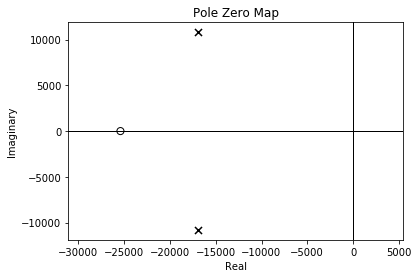

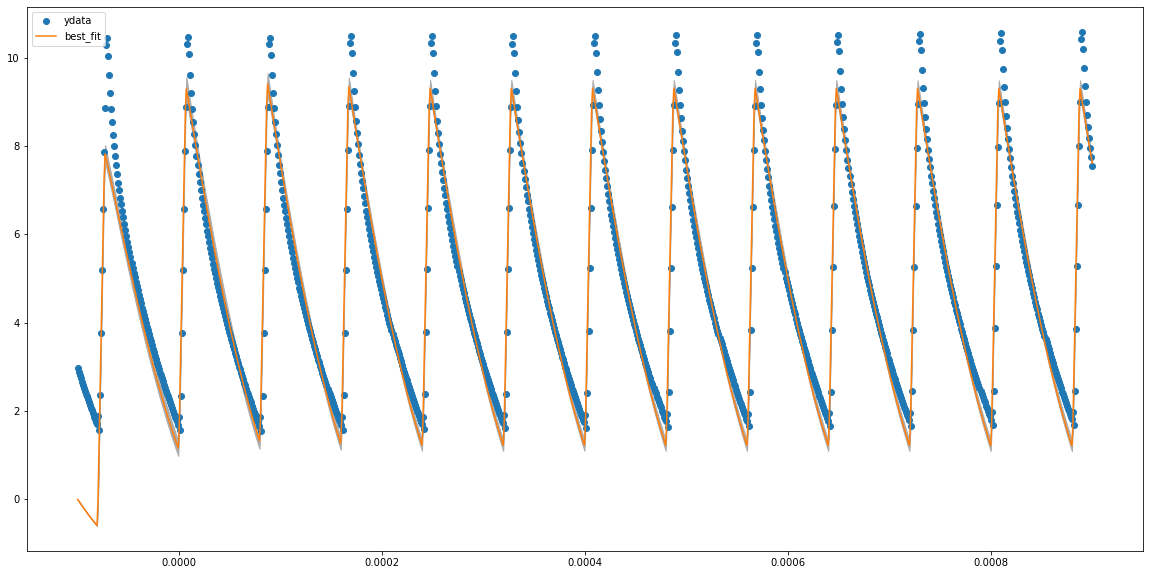

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 75
    # data points      = 1000
    # variables        = 4
    chi-square         = 822.205144
    reduced chi-square = 0.82550717
    Akaike info crit   = -187.765348
    Bayesian info crit = -168.134327
[[Variables]]
    Ra:  0.00241278 +/- 0.05029063 (2084.35%) (init = 0.195756)
    La:  3.7243e-05 +/- 5.6402e-07 (1.51%) (init = 2.322292e-05)
    B:   0.47623326 +/- 0.01079531 (2.27%) (init = 6.075322)
    J:   1.1372e-05 +/- 7.7360e-07 (6.80%) (init = 0.0002391251)
    kv:  10.47198 (fixed)
    kt:  0.1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ra, J)  =  0.977
    C(Ra, B)  =  0.972
    C(La, J)  = -0.957
    C(B, J)   =  0.954
    C(Ra, La) = -0.945
    C(La, B)  = -0.935
Parameter for SPICE: model
.param Ra = 0.0024127784439375603
.param La = 3.724301481799449e-05
.param B = 0.4762332600710645
.param J = 1.1372036562945228e-05
.param kv = 10.47197551

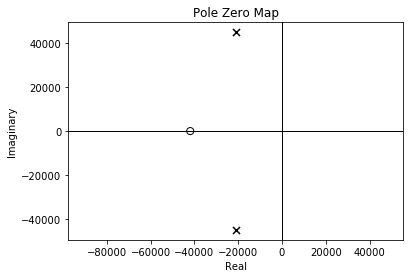

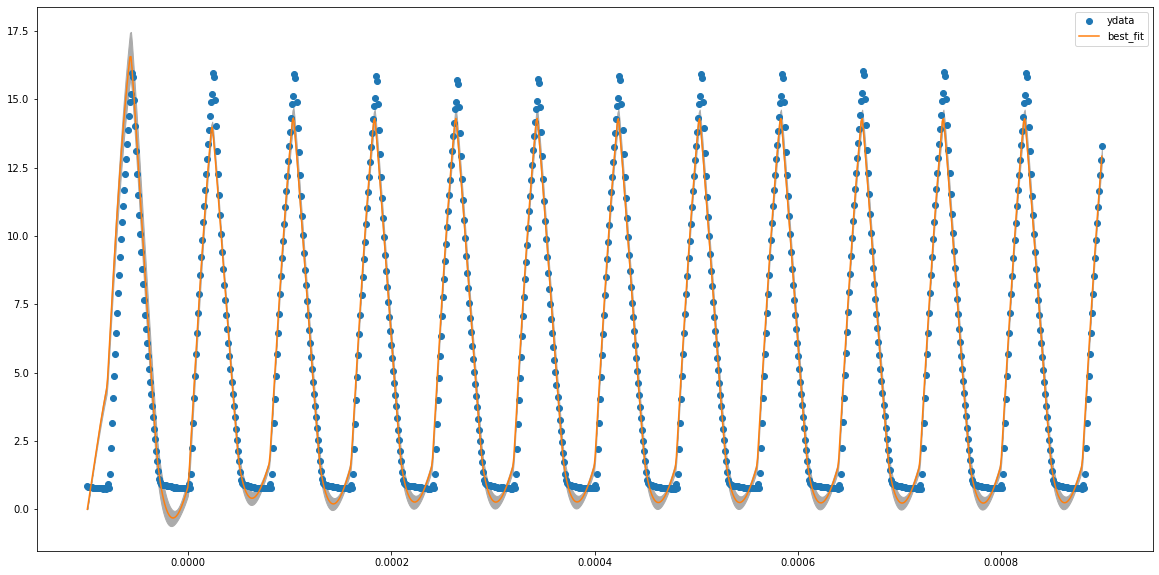

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 18
    # data points      = 1000
    # variables        = 4
    chi-square         = 1372.30803
    reduced chi-square = 1.37781931
    Akaike info crit   = 324.494018
    Bayesian info crit = 344.125039
[[Variables]]
    Ra:  0.00376941 +/- 0.06392207 (1695.81%) (init = 0.002412778)
    La:  4.0221e-05 +/- 7.3808e-07 (1.84%) (init = 3.724301e-05)
    B:   0.38975122 +/- 0.00920116 (2.36%) (init = 0.4762333)
    J:   9.5407e-06 +/- 6.8384e-07 (7.17%) (init = 1.137204e-05)
    kv:  10.47198 (fixed)
    kt:  0.1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ra, J)  =  0.978
    C(Ra, B)  =  0.968
    C(La, J)  = -0.960
    C(B, J)   =  0.952
    C(Ra, La) = -0.947
    C(La, B)  = -0.936
Parameter for SPICE: model
.param Ra = 0.0037694133188737877
.param La = 4.0221469155696897e-05
.param B = 0.38975122481585345
.param J = 9.540668172676632e-06
.param kv = 10.47197

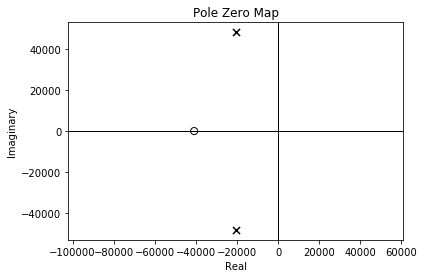

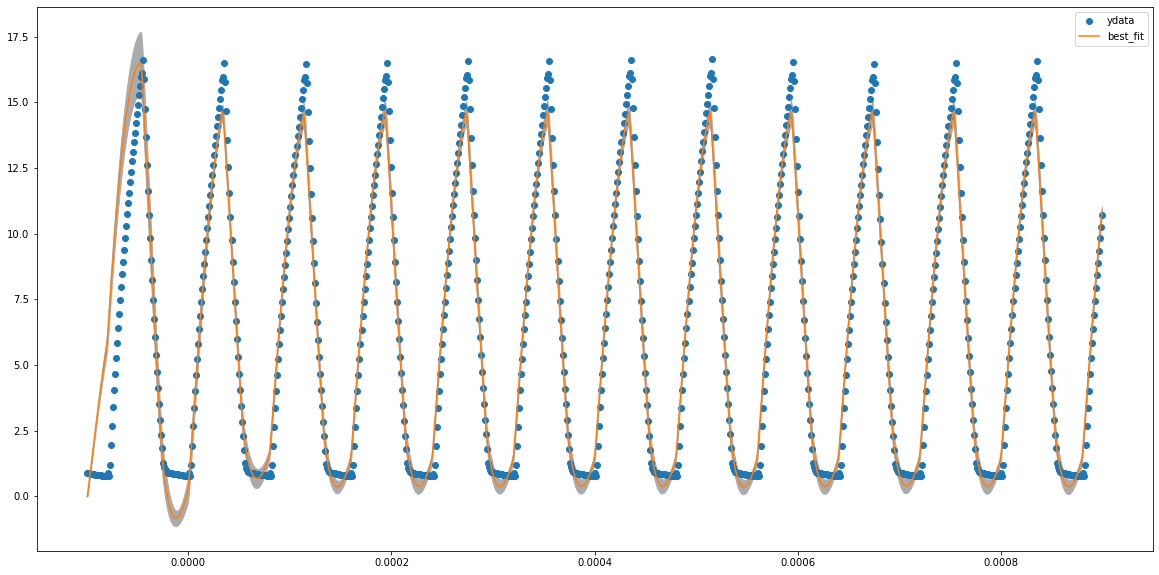

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 18
    # data points      = 1000
    # variables        = 4
    chi-square         = 2007.66111
    reduced chi-square = 2.01572401
    Akaike info crit   = 704.970419
    Bayesian info crit = 724.601440
[[Variables]]
    Ra:  0.00363680 +/- 0.08798914 (2419.41%) (init = 0.003769413)
    La:  4.6659e-05 +/- 1.1249e-06 (2.41%) (init = 4.022147e-05)
    B:   0.26412257 +/- 0.00590960 (2.24%) (init = 0.3897512)
    J:   7.2668e-06 +/- 5.3258e-07 (7.33%) (init = 9.540668e-06)
    kv:  10.47198 (fixed)
    kt:  0.1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ra, J)  =  0.968
    C(La, J)  = -0.952
    C(Ra, La) = -0.930
    C(Ra, B)  =  0.930
    C(B, J)   =  0.911
    C(La, B)  = -0.898
Parameter for SPICE: model
.param Ra = 0.0036367993179868933
.param La = 4.665930996200896e-05
.param B = 0.26412256733908407
.param J = 7.266820395944122e-06
.param kv = 10.471975

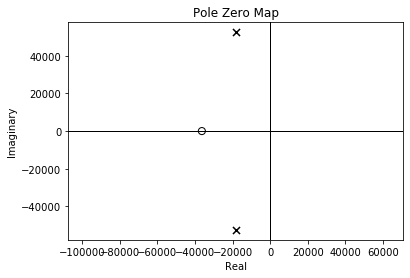

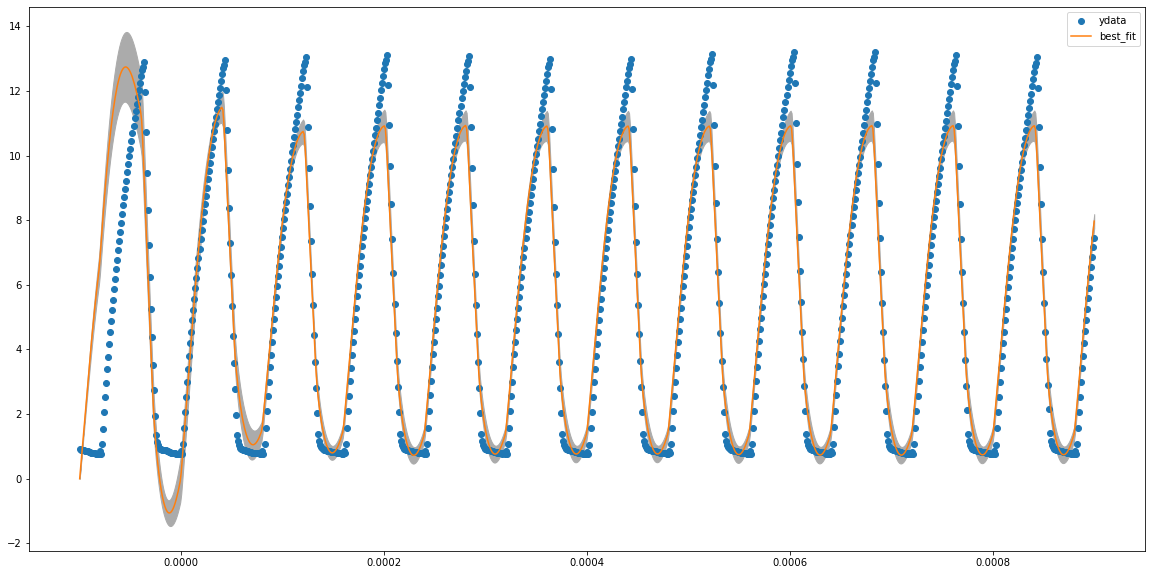

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 1000
    # variables        = 4
    chi-square         = 2308.64706
    reduced chi-square = 2.31791874
    Akaike info crit   = 844.661666
    Bayesian info crit = 864.292687
[[Variables]]
    Ra:  0.02816749 +/- 0.13936551 (494.77%) (init = 0.003636799)
    La:  5.1891e-05 +/- 1.6960e-06 (3.27%) (init = 4.665931e-05)
    B:   0.22712847 +/- 0.00685253 (3.02%) (init = 0.2641226)
    J:   5.8863e-06 +/- 5.5463e-07 (9.42%) (init = 7.26682e-06)
    kv:  10.47198 (fixed)
    kt:  0.1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ra, J)  =  0.972
    C(La, J)  = -0.953
    C(Ra, B)  =  0.952
    C(Ra, La) = -0.936
    C(B, J)   =  0.933
    C(La, B)  = -0.917
Parameter for SPICE: model
.param Ra = 0.028167490365220486
.param La = 5.189134809591475e-05
.param B = 0.2271284674445716
.param J = 5.886313575975352e-06
.param kv = 10.4719755119

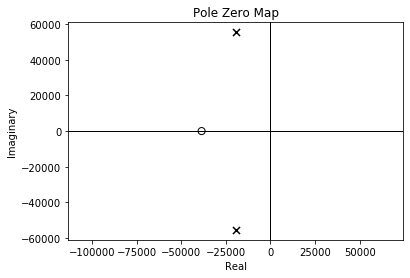

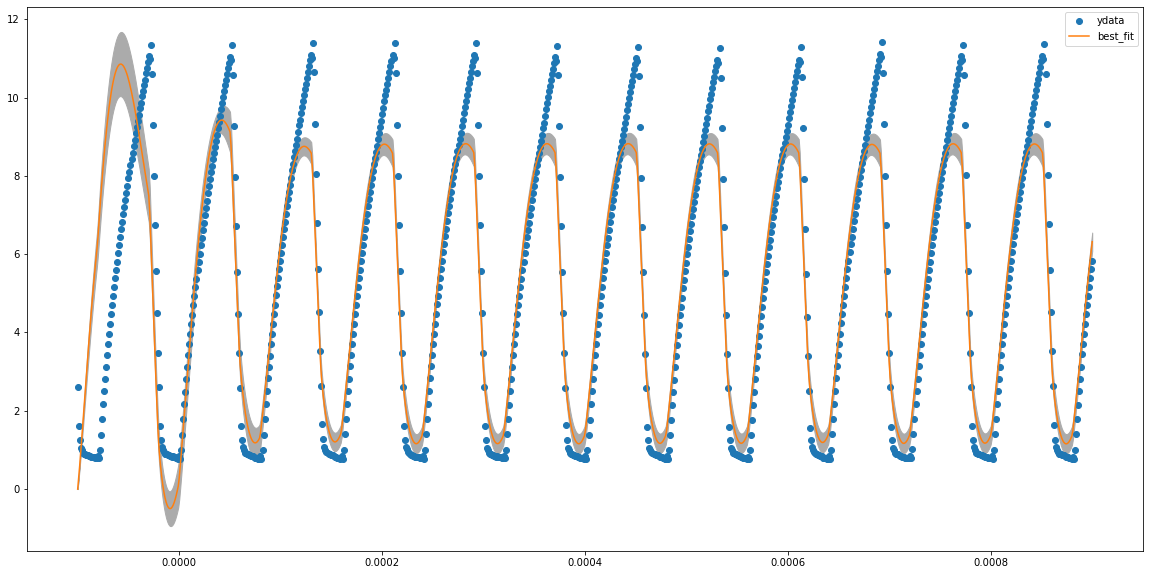

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 1000
    # variables        = 4
    chi-square         = 798.904957
    reduced chi-square = 0.80211341
    Akaike info crit   = -216.513293
    Bayesian info crit = -196.882272
[[Variables]]
    Ra:  0.24069014 +/- 1.38103462 (573.78%) (init = 0.02816749)
    La:  5.3694e-05 +/- 5.3768e-06 (10.01%) (init = 5.189135e-05)
    B:   0.22014382 +/- 0.06381957 (28.99%) (init = 0.2271285)
    J:   1.8809e-06 +/- 9.7569e-07 (51.87%) (init = 5.886314e-06)
    kv:  10.47198 (fixed)
    kt:  0.1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ra, B)  =  1.000
    C(Ra, J)  =  0.985
    C(B, J)   =  0.985
    C(La, B)  = -0.903
    C(Ra, La) = -0.903
    C(La, J)  = -0.863
Parameter for SPICE: model
.param Ra = 0.2406901374158083
.param La = 5.369418329698115e-05
.param B = 0.22014382496907367
.param J = 1.8808509477367185e-06
.param kv = 10.47197

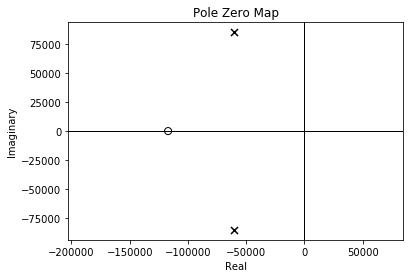

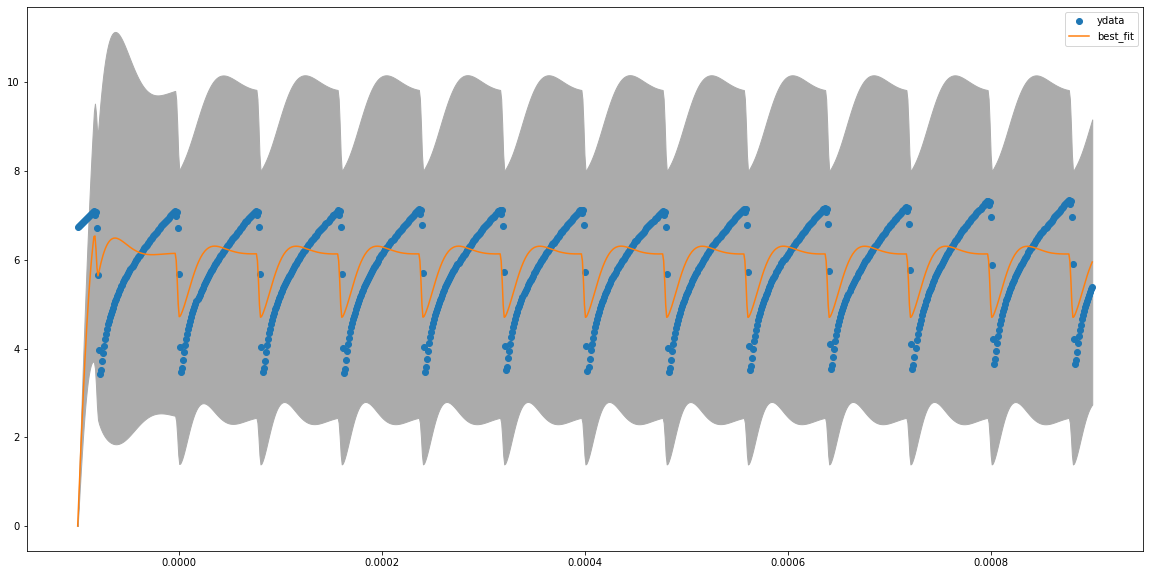

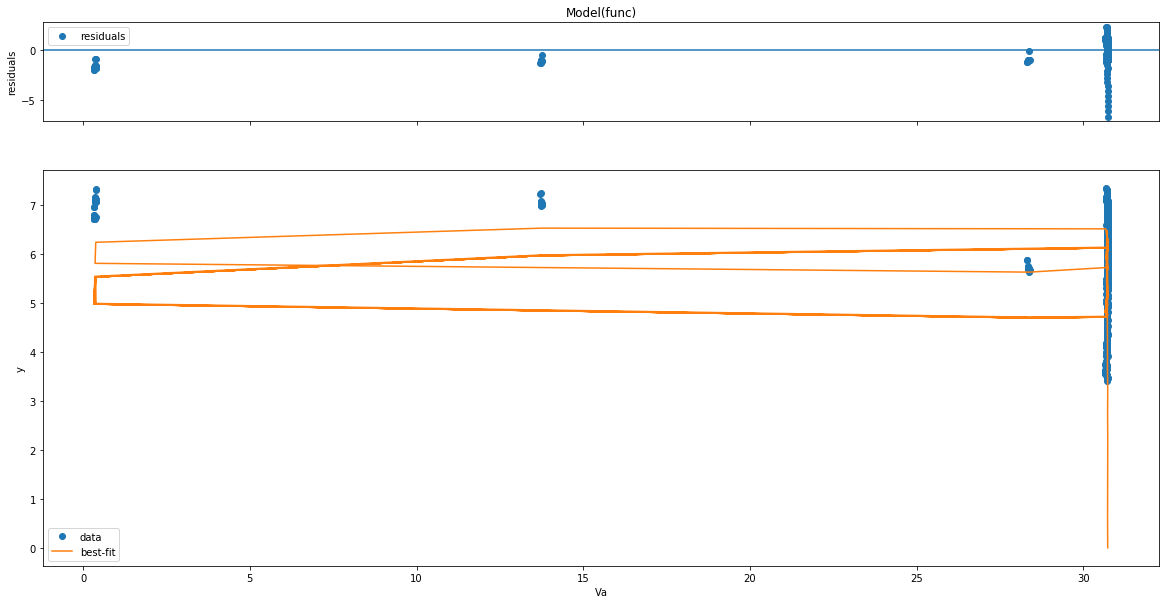

In [7]:
## Optimization - Using High Frequency Data, getting a different model for each duty-cycle

time = time_hf
for i in range(len(data_file_hf)):
    if i == 0:
        result_hf = model.fit(ydata_hf[i], params=params, B=1e-3, J=1e-3, Va=xdata_hf[i])
    else:
        result_hf.fit(ydata_hf[i], Va=xdata_hf[i])
    
    print(result_hf.fit_report())
    print_spice_model_parameters(result_hf)
    get_and_print_sys_model(result_hf)
    
    plt.figure(figsize=(20, 10))
    plt.plot(time_hf, ydata_hf[i], 'o', label='ydata')
#     plt.plot(time_hf, result_hf.init_fit, 'k--', label='init_fit')
    plt.plot(time_hf, result_hf.best_fit, '-', label='best_fit')
    dely = result_hf.eval_uncertainty(sigma=3)
    plt.fill_between(time_hf, result_hf.best_fit-dely, result_hf.best_fit+dely, color="#ABABAB")
    plt.legend()
    plt.show()

result_hf.plot(fig_kws=dict(figsize=(20,10)));

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 117
    # data points      = 6000
    # variables        = 4
    chi-square         = 108064.759
    reduced chi-square = 18.0228084
    Akaike info crit   = 17353.8272
    Bayesian info crit = 17380.6253
[[Variables]]
    Ra:  0.24127740 +/- 0.05348455 (22.17%) (init = 0.02412774)
    La:  2.9254e-04 +/- 1.1348e-05 (3.88%) (init = 6.8e-05)
    B:   0.23446530 +/- 0.00407798 (1.74%) (init = 0.001)
    J:   2.2988e-04 +/- 1.3158e-05 (5.72%) (init = 0.001)
    kv:  10.47198 (fixed)
    kt:  0.1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(La, J)  = -0.814
    C(Ra, J)  =  0.758
    C(Ra, La) = -0.621
    C(Ra, B)  =  0.339
Parameter for SPICE: model
.param Ra = 0.24127740411738577
.param La = 0.0002925440269293511
.param B = 0.23446529792105406
.param J = 0.00022987813866367273
.param kv = 10.471975511965978
.param kt = 0.1

Ia/Va = 
   3418 s + 3.486e+06
-------

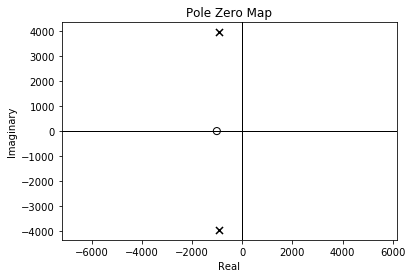

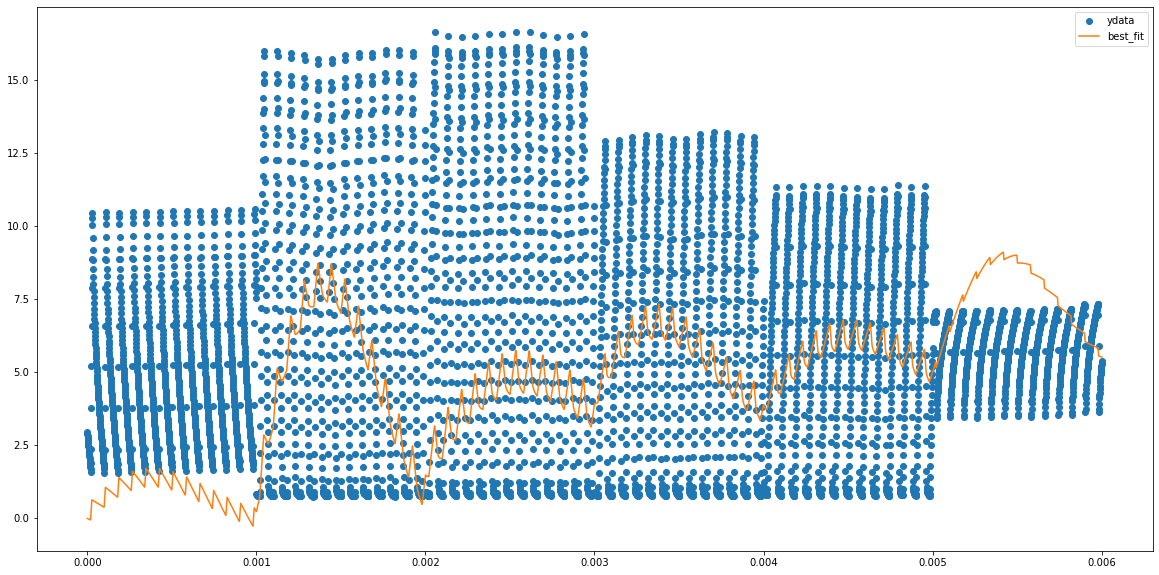

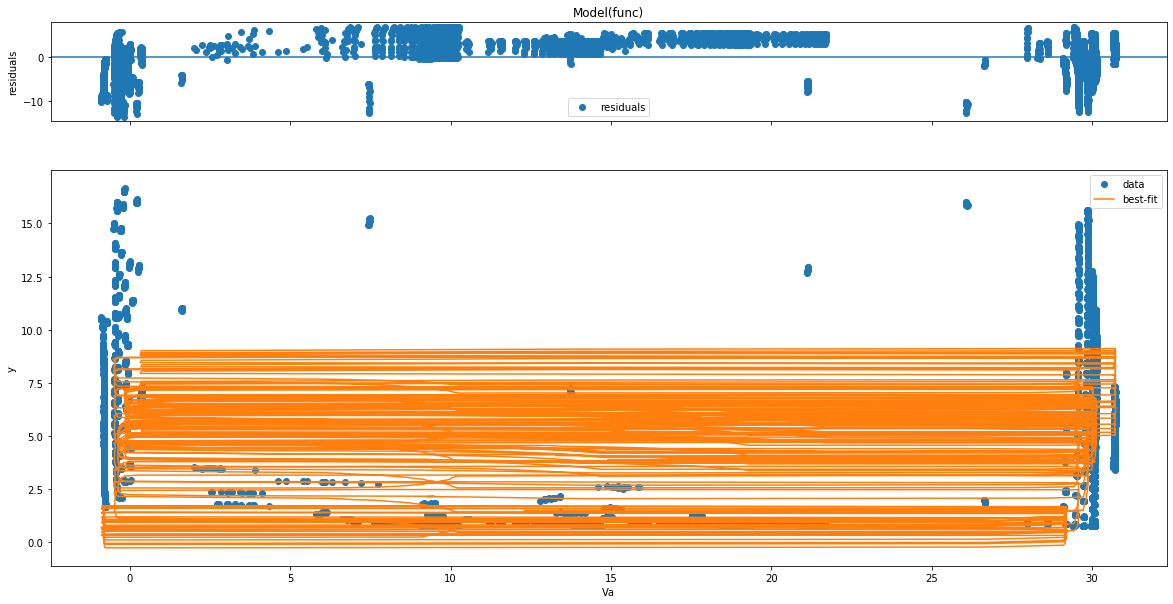

In [8]:
## Optimization - Using High Frequency Stacked Data

del_time = np.round(time_hf[-2] -time_hf[-3], 8)
t_start = 0
t_size = len(xdata_hf_all)
t_end = del_time * (t_size +1)
time = np.linspace(t_start, t_end, t_size)
    
result_hf = model.fit(ydata_hf_all, params=params, B=1e-3, J=1e-3, Va=xdata_hf_all)

print(result_hf.fit_report())
print_spice_model_parameters(result_hf)
get_and_print_sys_model(result_hf)

plt.figure(figsize=(20, 10))
plt.plot(time, ydata_hf_all, 'o', label='ydata')
# plt.plot(time, result_hf.init_fit, 'k--', label='init_fit')
plt.plot(time, result_hf.best_fit, '-', label='best_fit')
# dely = result_hf.eval_uncertainty(sigma=3)
# plt.fill_between(time, result_hf.best_fit-dely, result_hf.best_fit+dely, color="#ABABAB")
plt.legend()
plt.show()

result_hf.plot(fig_kws=dict(figsize=(20,10)));

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 1250
    # variables        = 4
    chi-square         = 15430.7616
    reduced chi-square = 12.3842388
    Akaike info crit   = 3149.52434
    Bayesian info crit = 3170.04793
[[Variables]]
    Ra:  0.01898776 +/- 2.6252e-05 (0.14%) (init = 0.02412774)
    La:  6.8025e-05 +/- 2.0539e-07 (0.30%) (init = 6.8e-05)
    B:   1.53398988 +/- 0.03161887 (2.06%) (init = 1.5)
    J:   1.07612565 +/- 0.00163974 (0.15%) (init = 1)
    kv:  10.47198 (fixed)
    kt:  0.1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(B, J)   = -0.815
    C(Ra, B)  = -0.553
    C(Ra, J)  =  0.502
    C(La, J)  = -0.451
    C(La, B)  =  0.337
    C(Ra, La) = -0.216
Parameter for SPICE: model
.param Ra = 0.24127740411738577
.param La = 0.0002925440269293511
.param B = 0.23446529792105406
.param J = 0.00022987813866367273
.param kv = 10.471975511965978
.param kt = 0.1



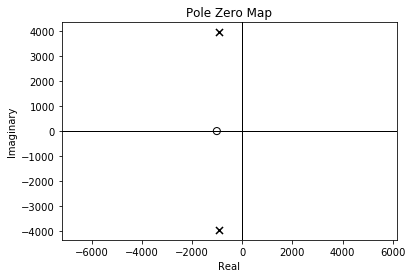

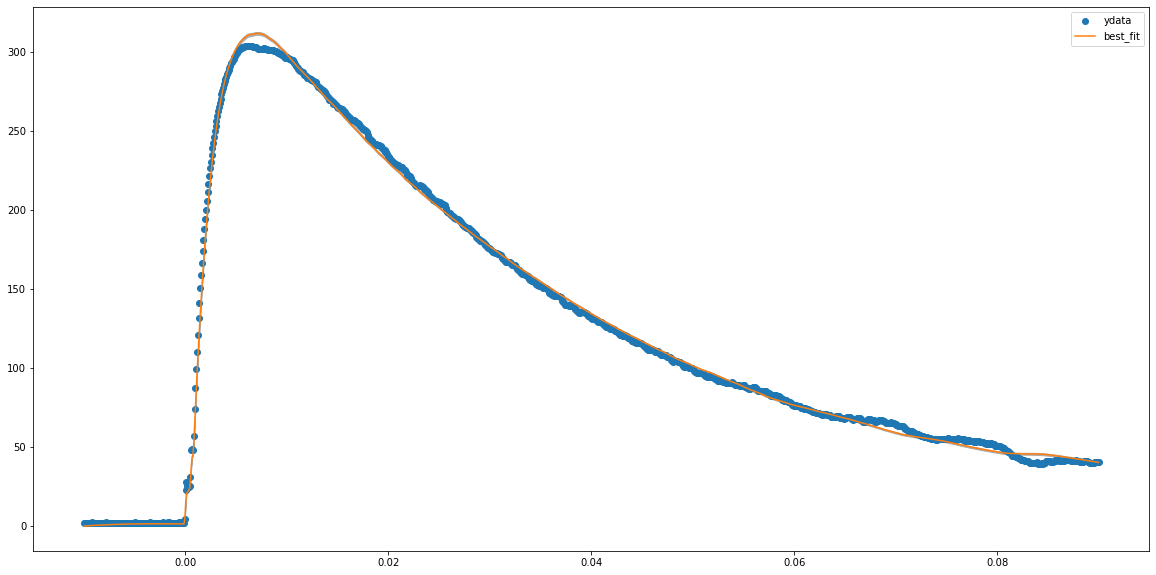

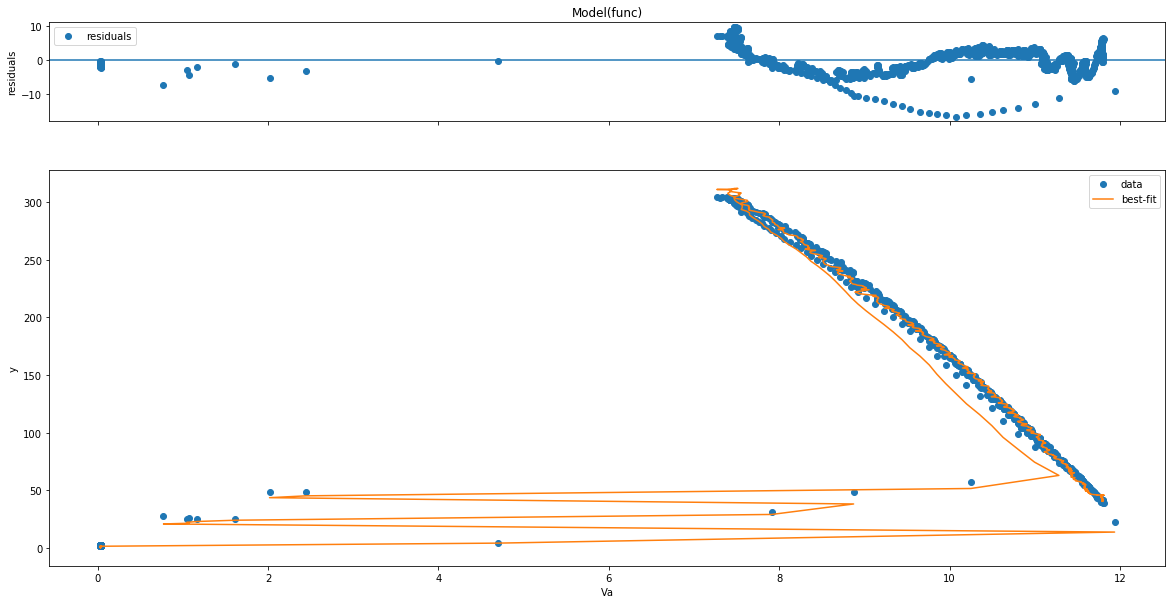

In [9]:
## Optimization - Using Low Frequency Data

time = time_lf
result_lf = model.fit(ydata_lf, params=params, Va=xdata_lf)

print(result_lf.fit_report())
print_spice_model_parameters(result_hf)
get_and_print_sys_model(result_hf)

plt.figure(figsize=(20, 10))
plt.plot(time_lf, ydata_lf, 'o', label='ydata')
# plt.plot(time_lf, result_lf.init_fit, 'k--', label='init_fit')
plt.plot(time_lf, result_lf.best_fit, '-', label='best_fit')
dely = result_lf.eval_uncertainty(sigma=3)
plt.fill_between(time_lf, result_lf.best_fit-dely, result_lf.best_fit+dely, color="#ABABAB")
plt.legend()
plt.show()

result_lf.plot(fig_kws=dict(figsize=(20,10)));

In [10]:
def write_pwl_file(file_name:str, 
                   time: np.array, 
                   data: np.array):
    np.savetxt(
        voltage_pwl_file, 
        X=np.vstack((time, data)).T,
        fmt='%.2e', 
        delimiter=' ', 
        newline='\n'
    )
    
# voltage_pwl_file = 'voltage_pwl.txt'
# write_pwl_file(voltage_pwl_file, time, xdata)